# Week2 (Veera Reddy Koppula)

###### Using a data set of your choice, write an introduction explaining the data set.

I have selected Heart Failure Prediction Dataset from Kaggle.com
<br>This Dataset outlines 11 clinical features for predicting heart disease events.

**Context for the data set**
<br>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

<br>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**
<br>1.Age: age of the patient [years]
<br>2.Sex: sex of the patient [M: Male, F: Female]
<br>3.ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
<br>4.RestingBP: resting blood pressure [mm Hg]
<br>5.Cholesterol: serum cholesterol [mm/dl]
<br>6.FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
<br>7.RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
<br>8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
<br>9.ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
<br>10.Oldpeak: oldpeak = ST [Numeric value measured in depression]
<br>11.ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
<br>12.HeartDisease: output class [1: heart disease, 0: Normal]

**Source**
<br>https://www.kaggle.com/fedesoriano/heart-failure-prediction


###### Identify a question or question(s) that you would like to explore in your data set.

I would like to explore if there is any corelation between Sex, ChestpainType, Cholesterol, Fasting BS, Excercise Angina, Resting ECG and ST Slope to outcome if the patient has heart Disease.

###### Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np

In [5]:
#Importing dataset
heart  = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
#Exploring data set
def describe(heart):                        # Function to explore major elements in a Dataset
  columns=heart.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=heart.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(heart.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(heart.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(heart.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(heart.info())
  print('')
  print('')

In [7]:
describe(heart)

Name of all columns in the dataframe:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Number of columns in the dataframe:
12

Name of all numerical columns in the dataframe:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

Number of numerical columns in the dataframe:
7

Name of all categorical columns in the dataframe:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Number of categorical columns in the dataframe:
5

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Number of Unique Value

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

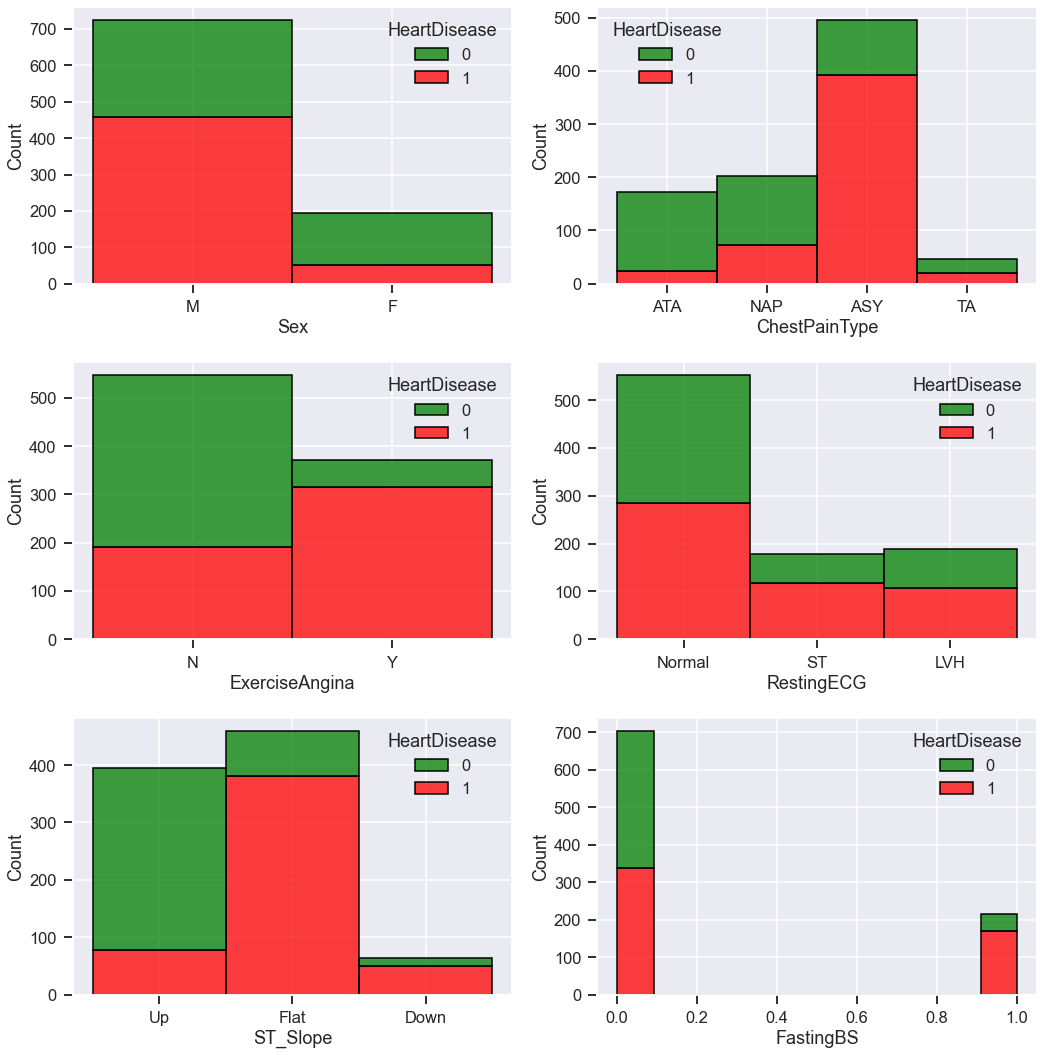

In [10]:
#Drawing visualizations
#setting visualization context
oe=['g','r']
fig = plt.figure(figsize=(15,15))

#Plot Number 1 - xlabel='Sex ', ylabel='Count'
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

#Plot Number 2 - xlabel='ChestPainType', ylabel='Count'
plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

#Plot Number 3 - xlabel='ExerciseAngina', ylabel='Count'
plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

#Plot Number 4 - xlabel='RestingECG', ylabel='Count'
plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

#Plot Number 5 - xlabel='ST_Slope', ylabel='Count'
plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

#Plot Number 6 - xlabel='FastingBS', ylabel='Count'
plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=heart, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


###### Explain what you have learned from each of your graphs.

<br>1. It appears Men have higher incidence of heart rate disease than women
<br>2. It appears when the Angina (chest tightness and pain) is asymptomatic (Has no previous indications) could have resulted from a heart disease
<br>3. It appears if the angina in a patient could be induced in a clinical exercise settings, its a hihgly probabilistic indicator of underlying hear disease
<br>4. It appears if the ECG results show a sign of variability of abnormolity, it a higher probabilistic indicator of underlying heart disease. Although a normal indication on ECG, is still almost a 50/50 chance of underlying heart disease
<br>5. It appears if the ST segment/heart rate slope is flat/down - its a strong predictor of underlying heart disease.
<br>6. It appears if the fasting blood sugar is >120mg/dl, its a strong predictor of underlying heart disease. However, having a fasting blood sugar <120 mg/dl doesnt automatically reduce the risk

###### Write a conclusion that summarizes your findings.

When reviewing the data and mapping correlations, there are some strong indicators to look and assess the underlying heart disease in patients like higher fasing blood sugar > 120 mg/dl, a downward ST slope and ability to introduce excercise angina. However this doesnt imply that lack of these indicators rule out heartdisease easily. A health care practioner can make a strong positive correlation to asses the likelyhood of heart condition, when some of the indicators mentioned above are positve - but should make every effort to ruleout as many variables as possible to asses the heart conditions.